In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sps
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [8]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [19]:
confidence = 0.01
student_criteria = stats.ttest_ind(A,B,equal_var=True)
print(f'student_criteria = {student_criteria[1]:.3f}' )
if student_criteria[1] < confidence: 
    print(f'критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

student_criteria = 0.085
критерий Стьюдента > 0.01 --> H0 = True: Распределения НЕ различаются с 99 % уверенностью


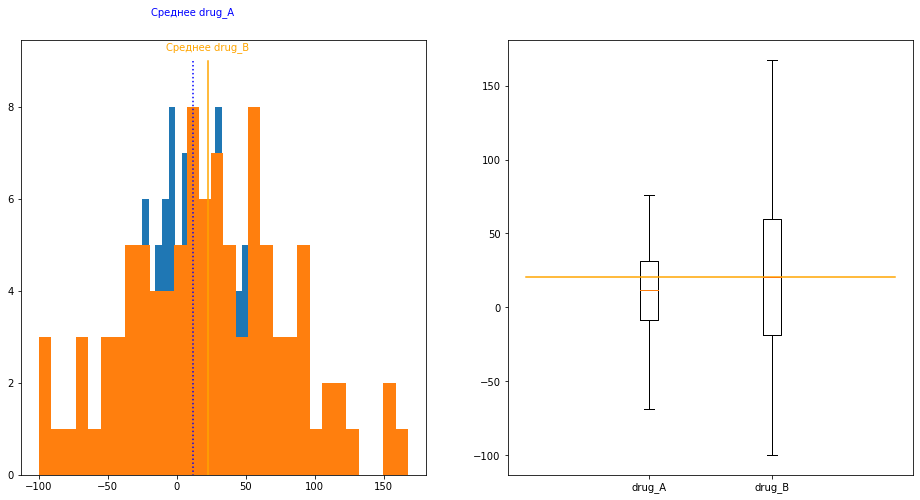

In [61]:
rcParams['figure.figsize'] = 16,8
fig = plt.figure()

#hist
fig.add_subplot(121)
plt.hist(A,bins = 30)
plt.hist(B,bins = 30)

m_1 = np.array(A).mean()
plt.plot([m_1 , m_1], [9,0],':m', c= 'blue')
plt.text(m_1, 10, 'Среднее drug_A', c= 'blue', rotation = 'horizontal', ha = 'center')

m_2 = np.array(B).mean()
plt.plot([m_2 , m_2], [9,0], c= 'orange')
plt.text(m_2, 9.25, 'Среднее drug_B', c= 'orange', rotation = 'horizontal', ha = 'center')


#box
fig.add_subplot(122)
data = [A, B]
plt.boxplot(data,0,'', labels = ['drug_A','drug_B'],vert = True)
m_2 = np.median(np.array(B))
plt.plot([0,3],[m_2 , m_2], c= 'orange')

plt.show()

Распределения НЕ различаются с 99 % уверенностью

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [42]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [43]:
confidence = 0.01
student_criteria = stats.ttest_rel(A,B)
print(f'student_criteria = {student_criteria[1]:.3f}' )
if student_criteria[1] < confidence: 
    print(f'критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

student_criteria = 0.032
критерий Стьюдента > 0.01 --> H0 = True: Распределения НЕ различаются с 99 % уверенностью


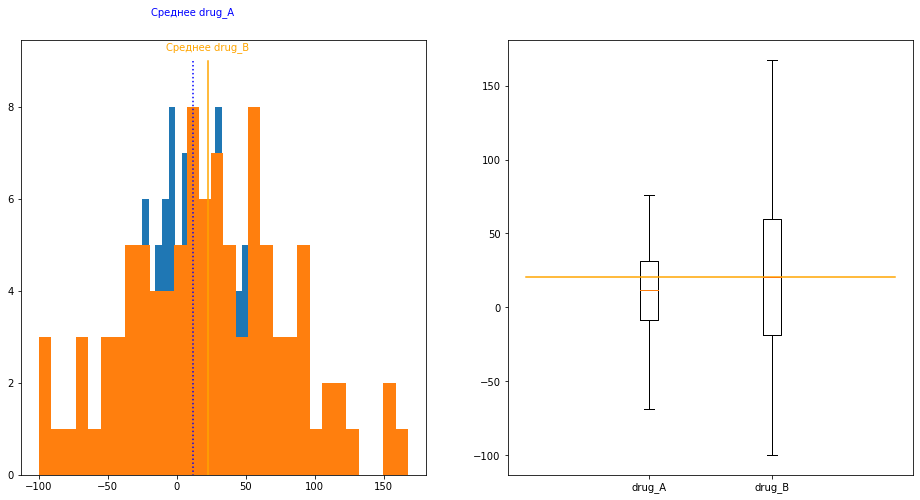

In [62]:
rcParams['figure.figsize'] = 16,8
fig = plt.figure()

#hist
fig.add_subplot(121)
plt.hist(A,bins = 30)
plt.hist(B,bins = 30)

m_1 = np.array(A).mean()
plt.plot([m_1 , m_1], [9,0],':m', c= 'blue')
plt.text(m_1, 10, 'Среднее drug_A', c= 'blue', rotation = 'horizontal', ha = 'center')

m_2 = np.array(B).mean()
plt.plot([m_2 , m_2], [0,9], c= 'orange')
plt.text(m_2, 9.25, 'Среднее drug_B', c= 'orange', rotation = 'horizontal', ha = 'center')


#box
fig.add_subplot(122)
data = [A, B]
plt.boxplot(data,0,'', labels = ['drug_A','drug_B'],vert = True)
m_2 = np.median(np.array(B))
plt.plot([0,3],[m_2 , m_2], c= 'orange')

plt.show()

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [68]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [99]:
plants = pd.DataFrame()
plants['data'] = water + nutri + mineral
plants['type'] = ['water']*len(water) + ['nutri']*len(nutri) + ['mineral']*len(mineral)

<AxesSubplot:xlabel='data', ylabel='Count'>

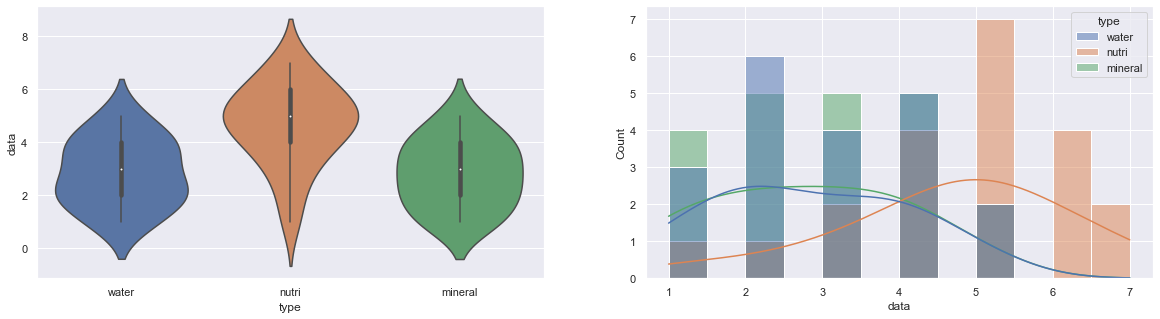

In [142]:
fig = plt.figure()
fig.add_subplot(121)
sns.set(rc={'figure.figsize':(20, 5)})
sns.violinplot(x='type', y='data', data = plants)   

fig.add_subplot(122)
#sns.set(rc={'figure.figsize':(7, 5)})
sns.histplot(x='data', hue='type', data= plants, bins = 8, binwidth=.5, kde = True)

видно что распределение nutri отличается как медианой так и самой коробкой.

In [86]:
# по виду все распределния нормальные , кроме nutri. Проверим на нормальность.
st1, p1 = stats.shapiro(nutri)  
print(f'p1 =  {p1:.3f}')

if (p1 > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

p1 =  0.174
критерий Шапиро-Уилка: Распределение нормально


In [109]:
#Так как задании указано применить три разных теста на принадлежность одной ГС, 
#   то будем применять U-test (Манна-Уитни), хотя тут более точен т-тест Стьюдента (все распределения нормальные)
from scipy.stats import mannwhitneyu

print('Сравним "water" и "nutri"')
u_test = mannwhitneyu(water, nutri) 
print('Statistics=%.3f, p=%.5f' % (u_test[0], u_test[1]))
print('-' *35)
confidence = 0.01   
   
if (u_test[1] > confidence/2) and ( u_test[1] < (1- confidence/2) ) : 
    print(f'Критерий Уилкоксона-Манна-Уитни > {confidence/2} или  < {1- confidence/2}  \n \t --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'Критерий Уилкоксона-Манна-Уитни < {confidence/2} или  > {1- confidence/2} \n \t  --> H0 != True: Распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью')

Сравним "water" и "nutri"
Statistics=75.500, p=0.00019
-----------------------------------
Критерий Уилкоксона-Манна-Уитни < 0.005 или  > 0.995 
 	  --> H0 != True: Распределения НЕ принадлежат одной ГС с 99 % уверенностью


In [98]:
#Проведем многовыборочный критерий Уилкоксона-Манна-Уитни( или Критерий Краскела — Уоллиса)
MultiComp = MultiComparison(plants['data'],
                            plants['type'])
MultiComp.allpairtest(mannwhitneyu, alpha = confidence)[0]

group1,group2,stat,pval,pval_corr,reject
mineral,nutri,77.5,0.0001,0.0004,True
mineral,water,206.5,0.468,1.0,False
nutri,water,75.5,0.0002,0.0006,True


 Отклоняем однородность :  mineral &	nutri и nutri &	water  
 При том, однородны: mineral & water   
### Стало быть: 
- выборка nutri не пренадлежит ГС, общей для двух других выборок. 
- Судя по violinplot и histplot, выборка nutri - имеет выраженное влияние на продукт


# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [136]:
cookie_cats = 'cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [141]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [144]:
data.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [293]:
v_30 = data.loc[data.version.str.contains('gate_30'),'sum_gamerounds']
v_30.count()

44700

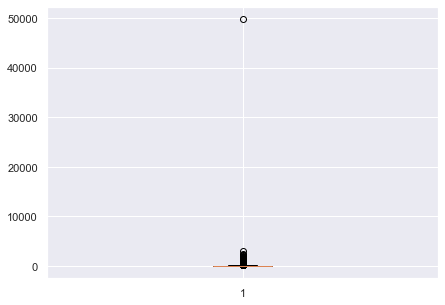

In [273]:
rcParams['figure.figsize'] = 7,5
plt.boxplot(v_30);

Уберем выбросы:

In [294]:
q1 = pd.DataFrame(v_30).quantile(0.25).sum_gamerounds
q3 = pd.DataFrame(v_30).quantile(0.75).sum_gamerounds
iqr = 1.75*(q3 - q1)
iqr_q3 = iqr + q3

In [295]:
v_30 = v_30[v_30 < iqr_q3]
v_30.count()

39977

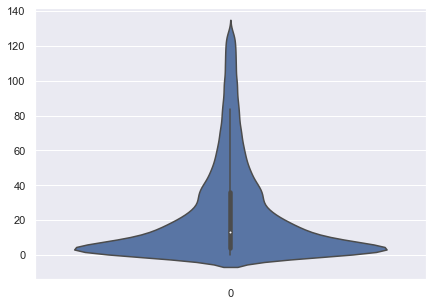

In [302]:
sns.violinplot(data = v_30);

Сделаем то же самое для Gate_40

In [297]:
v_40 = data.loc[data.version.str.contains('gate_40'),'sum_gamerounds']
v_40.count()

45489

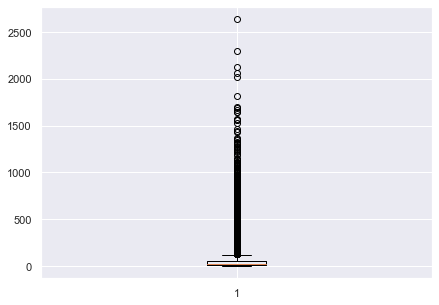

In [298]:
rcParams['figure.figsize'] = 7,5
plt.boxplot(v_40);

Уберем выбросы:

In [299]:
q1 = pd.DataFrame(v_40).quantile(0.25).sum_gamerounds
q3 = pd.DataFrame(v_40).quantile(0.75).sum_gamerounds
iqr = 1.75*(q3 - q1)
iqr_q3 = iqr + q3

In [303]:
v_40 = v_40[v_40 < iqr_q3]
v_40.count()

40973

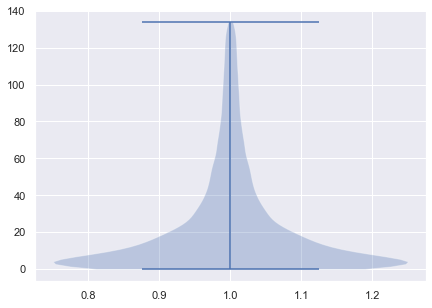

In [306]:
plt.violinplot(dataset = v_40);

<AxesSubplot:xlabel='0', ylabel='group'>

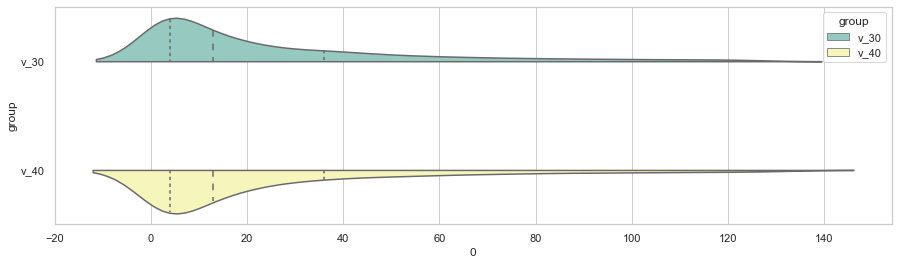

In [382]:
data_ = pd.DataFrame(data = list(v_30) + list(v_40) )
data_['group'] = ['v_30']*len(v_30) + ['v_40']*len(v_40)
data_

fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="whitegrid")
sns.violinplot(x = 0, y='group', hue='group', data = data_, split = True,  palette = 'Set3', inner="quartile",bw=.2, scale = 'count'  )

Разницы не видно

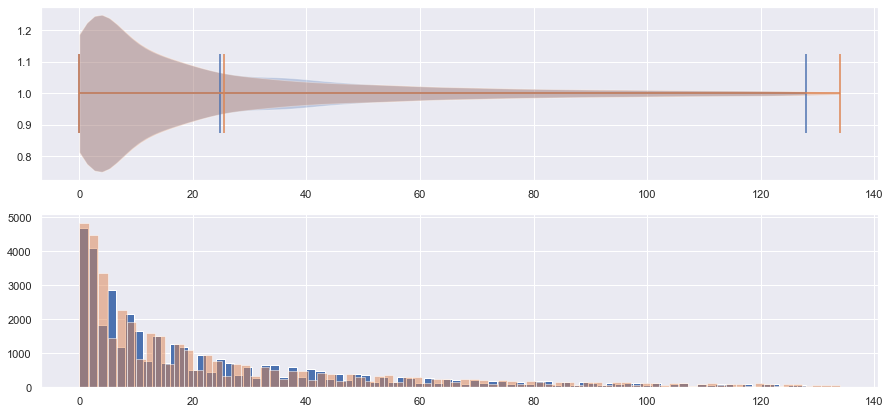

In [327]:
#Сравним
fig = plt.figure(figsize=(15, 7))
fig.add_subplot(211)
plt.violinplot(dataset = v_30,vert = False, showmeans = True );
plt.violinplot(dataset = v_40,vert = False, showmeans = True);

fig.add_subplot(212)
plt.hist(v_30, bins =80);
plt.hist(v_40,alpha = .5 , bins=80);

In [388]:
confidence = 0.01
student_criteria = stats.ttest_ind(v_30,v_40,equal_var=True)

print(f'student_criteria = {student_criteria[1]:.5f}', '\n', '-'*35 )
if student_criteria[1] < confidence: 
    print(f'\t критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, \n \t распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\t критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

student_criteria = 0.00049 
 -----------------------------------
	 критерий Стьюдента < 0.01 --> H0 != True: Средние распределений различаются, 
 	 распределения НЕ принадлежат одной ГС с 99 % уверенностью


Теперь вопрос с retention

In [548]:
sum_data = data.groupby(['version', 'retention_1','retention_7']).count()

In [549]:
sum_data = sum_data.reset_index()
sum_data.head(3)

,version,retention_1,retention_7,userid,sum_gamerounds
0,gate_30,False,False,22840,22840
1,gate_30,False,True,1826,1826
2,gate_30,True,False,13358,13358


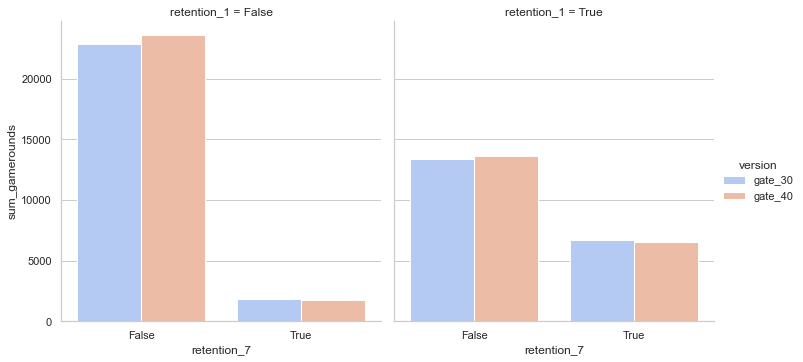

In [550]:
sns.catplot(x = 'retention_7', y = 'sum_gamerounds', col = 'retention_1', hue = 'version',
            data = sum_data, kind = 'bar', palette = 'coolwarm') 

### Вывод: 
- В основном, игроки играют в первый раз очень много, 
- Если игрок возвращается, то больше всего игр делается:
    1. если он вернулся на следующий день, 
    1. если он вернулся на следующий день, и через 7 дней 
    1. если он НЕ вернулся на следующий день, но вернулся через 7 дней 


In [502]:
# bootstrap retention means
mean_r1 = []
mean_r7 = []

for i in range(3000):    
    r1 = data.sample(frac=1, replace=True).groupby('version').retention_1.mean()#.loc[data.retention_1 == True].count() #.sum_gamerounds.mean()
    mean_r1.append(r1[0] - r1[1])

    r7 = data.sample(frac=1, replace=True).groupby('version').retention_7.mean()#.loc[data.retention_1 == True].count() #.sum_gamerounds.mean()
    mean_r7.append(r7[0] - r7[1])

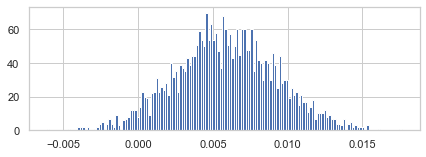

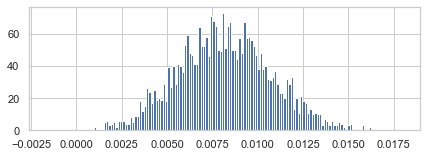

In [504]:
fig = plt.figure()
fig.add_subplot(211)
plt.hist(mean_r1,bins = 150);
fig = plt.figure()
fig.add_subplot(212)
plt.hist(mean_r7,bins = 150);

Оба распределения и близко к 0 не подходят, это говорит о различиях в средних retention_1 и retention_7.   
роверим существенны ли различия:

In [509]:
сonfidence = 0.01

print('retention 1 \n', '-'*35)
student_criteria = stats.ttest_1samp(mean_r1, 0)

print(f'statistic = {student_criteria[0]:.3f},  student_criteria = {student_criteria[1]:.5f}', '\n', '-'*35 )
if student_criteria[1] < confidence: 
    print(f'\t критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, \n \t распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\t критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')
    
print('\n retention 7 \n', '-'*35)
student_criteria = stats.ttest_1samp(mean_r7, 0)

print(f'statistic = {student_criteria[0]:.3f},  student_criteria = {student_criteria[1]:.5f}', '\n', '-'*35 )
if student_criteria[1] < confidence: 
    print(f'\t критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, \n \t распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\t критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')    
    

retention 1 
 -----------------------------------
statistic = 95.093,  student_criteria = 0.00000 
 -----------------------------------
	 критерий Стьюдента < 0.01 --> H0 != True: Средние распределений различаются, 
 	 распределения НЕ принадлежат одной ГС с 99 % уверенностью

 retention 7 
 -----------------------------------
statistic = 171.784,  student_criteria = 0.00000 
 -----------------------------------
	 критерий Стьюдента < 0.01 --> H0 != True: Средние распределений различаются, 
 	 распределения НЕ принадлежат одной ГС с 99 % уверенностью


Проверим сумму игр по выборкам А и В бутстрапом

In [461]:
# bootstrap A and B means

debug = False
means = []
for i in range(3000):
    one = data.query('version == "gate_30" ').sample(frac=1, replace=True).sum_gamerounds.mean()
    two = data.query('version == "gate_40" ').sample(frac=1, replace=True).sum_gamerounds.mean()
    means.append(one - two)
    if debug: print(f'one = {one}, two = {two}, means = {one-two}')


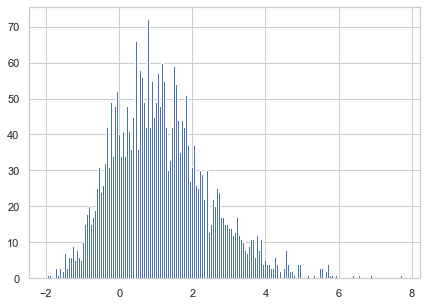

In [464]:
plt.hist(means, bins=180);

In [474]:
confidence = 0.01
student_criteria = stats.ttest_1samp(means, 0)

print(f'statistic = {student_criteria[0]:.3f},  student_criteria = {student_criteria[1]:.5f}', '\n', '-'*35 )
if student_criteria[1] < confidence: 
    print(f'\t критерий Стьюдента < {confidence} --> H0 != True: Средние распределений различаются, \n \t распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\t критерий Стьюдента > {confidence} --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

statistic = 47.851,  student_criteria = 0.00000 
 -----------------------------------
	 критерий Стьюдента < 0.01 --> H0 != True: Средние распределений различаются, 
 	 распределения НЕ принадлежат одной ГС с 99 % уверенностью


In [485]:
#Проверка t-test
m = np.array(means).mean()
sigma = stats.sem(means,ddof = 1)
t_value = (m - 0) / sigma

p_val = stats.norm.sf(t_value, loc = 0, scale = 1)

print(f'm = {m:.3f}, sigma = {sigma:.3f}, t_value = {t_value:.3f}, p_val = {p_val:.3f}')

m = 1.149, sigma = 0.024, t_value = 47.851, p_val = 0.000


То есть, с вероятностью 0%, значение т-теста стьюдента будет равно 47.   
Или другими словами, с вероятностью 0% выборки gate_30 и gate_40 похожи (то есть средние НЕ различаются)  
То, что средняя из выборки A-B = 1.2 c сигмой .2 говорит, что A = 1.2 + B или средняя gate_30 больше средней gate_40, чтобы выборки совпали нужно 6 сигм, а 99% доверительный интервал только 3 сигмы ->  
    то есть разница между средними достаточно существенная. 

### Выводы:
- А/В тест удался - получили валидные результаты,
- Выборки не пренадлежат одной ГС -> средние различаются
- выборка А (ворота 30) имеет среднюю по количеству сыгранных игр выше, чем выборка В (ворота 40)    

Возврат в игру:  
- В основном, игроки играют в первый раз очень много,   
- Если игрок возвращается, то больше всего игр делается:
    1. если он вернулся на следующий день, 
    1. если он вернулся на следующий день, и через 7 дней 
    1. если он НЕ вернулся на следующий день, но вернулся через 7 дней 
- Расположение ворот имеет значение: выборка А (ворота 30) имеет среднюю количеству возвратов через день и через 7 дней больше, чем в выборке В (ворота 40)
    
---> Ворота установить на 30 уровне

In [ ]:
#Ваши выводы

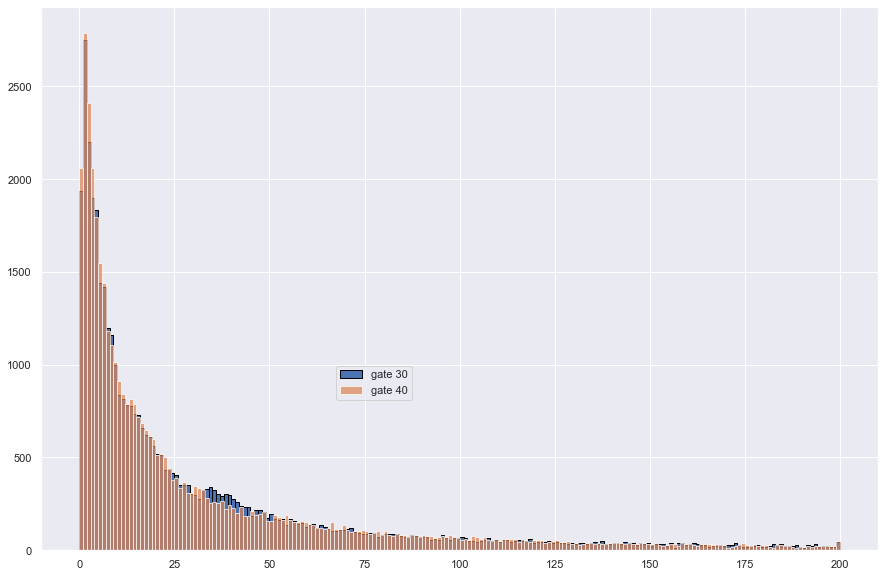

In [140]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

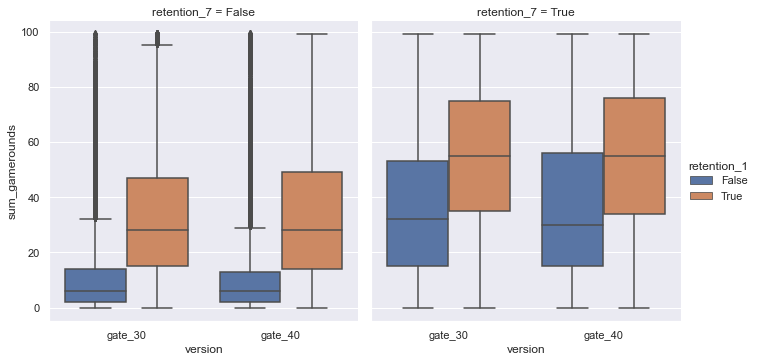

In [338]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

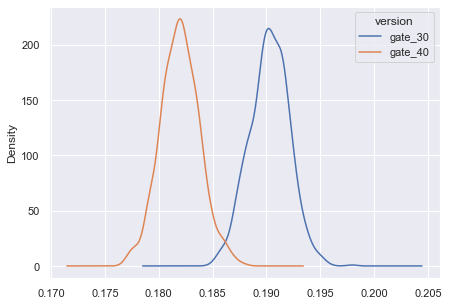

In [337]:
#Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
 

**Ваши выводы?** 

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [515]:
df = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
df.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [521]:
# уберем пробелы в столбцах чтобы легче к ним обрщаться было
df.columns = ['pid', 'Name', 'Class_1', 'Class_2', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary']
df.columns

Index(['pid', 'Name', 'Class_1', 'Class_2', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Legendary'],
      dtype='object')

In [601]:
grass = df.loc[df.Class_1.str.contains('Grass', na=False) ].loc[~df.Class_2.str.contains('Rock', na=False),'Attack']
rock = df.loc[df.Class_1.str.contains('Rock', na=False) ].loc[~df.Class_2.str.contains('Grass', na=False),'Attack']
grass_m = grass.mean()
rock_m = rock.mean()

Text(94.38095238095238, 9.25, 'Среднее rock')

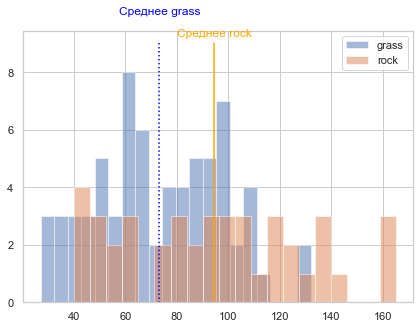

In [636]:
plt.hist(grass,bins=20,alpha = .5, label='grass');
plt.hist(rock,bins=20,alpha = .5, label='rock');
plt.legend(loc='upper right')

plt.plot([grass_m , grass_m], [9,0],':m', c= 'blue')
plt.text(grass_m, 10, 'Среднее grass', c= 'blue', rotation = 'horizontal', ha = 'center')

plt.plot([rock_m , rock_m], [9,0], c= 'orange')
plt.text(rock_m, 9.25, 'Среднее rock', c= 'orange', rotation = 'horizontal', ha = 'center')

Средние рядом, проверим, принадлежат ли они одной ГС

In [612]:
# проверим на нормальность - критерий Шапиро-Уилка
confidence = 0.05 # примем порог 5%

st, p_val = stats.shapiro(grass)  
print(f' grass \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    
st, p_val = stats.shapiro(rock)  
print(f'\n rock \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

 grass 	 p_val =  0.247 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально

 rock 	 p_val =  0.142 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально


In [615]:
# проверим на похожесть сигм - критерий фишера 
sigma1 = stats.sem(grass)
sigma2 = stats.sem(rock)
n1 = len(grass)
n2 = len(rock)

print(f'sigma1= {sigma1:.2f}, sigma2= {sigma2:.2f}')

criteria_F = sigma1 / sigma2
f = 1 - stats.f.cdf(criteria_F, n2-1, n1-1)
print( f'criteria_F = {criteria_F:.2f}, f = {f:.3f}', '\n', '-'*35)
if (f < confidence): print('критерий Фишера: H0 = True: отлонения (дисперсии) равны')
else: print('критерий Фишера: H0 != True: отлонения (дисперсии) отличаются')

sigma1= 3.03, sigma2= 5.43
criteria_F = 0.56, f = 0.977 
 -----------------------------------
критерий Фишера: H0 != True: отлонения (дисперсии) отличаются


In [626]:
# Отклонения отличаются - используем Welch t-test в критерий Стьюдента
confidence = 0.05

student_criteria = stats.ttest_ind(grass,rock, equal_var=False )
print(f'Stat = {student_criteria[0]:.3f}, Критерий Стьюдента = {student_criteria[1]:.3f}', '\n', '-'*35)
if student_criteria[1] < confidence: 
    print(f'\tкритерий Стьюдента < {confidence} --> \n\tH0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Стьюдента > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = -3.404, Критерий Стьюдента = 0.001 
 -----------------------------------
	критерий Стьюдента < 0.05 --> 
	H0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с 95 % уверенностью


In [602]:
#проверим средние
print(f'Grass_mean= {grass_m:.2f}, Rock_mean = {rock_m:.2f}', '\n','-'*35)
if grass_m > rock_m : print('\t Средняя атака "Grass" больше, чем средняя атака "Rock"')
else: print('\t Средняя атака "Rock" больше, чем средняя атака "Grass"')

Grass_mean= 73.21, Rock_mean = 94.38 
 -----------------------------------
	 Средняя атака "Rock" больше, чем средняя атака "Grass"


<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [631]:
water = df.loc[df.Class_1.str.contains('Water', na=False) ].loc[~df.Class_2.str.contains('Normal', na=False),'Speed']
normal = df.loc[df.Class_1.str.contains('Normal', na=False) ].loc[~df.Class_2.str.contains('Water', na=False),'Speed']
water_m = water.mean()
normal_m = normal.mean()

Text(71.55670103092784, 14.25, 'Среднее normal')

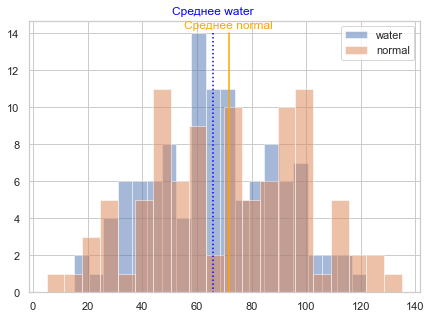

In [637]:
plt.hist(water,bins=20,alpha = .5, label='water');
plt.hist(normal,bins=20,alpha = .5, label='normal');
plt.legend(loc='upper right')

plt.plot([water_m , water_m], [14,0],':m', c= 'blue')
plt.text(water_m, 15, 'Среднее water', c= 'blue', rotation = 'horizontal', ha = 'center')

plt.plot([normal_m , normal_m], [14,0], c= 'orange')
plt.text(normal_m, 14.25, 'Среднее normal', c= 'orange', rotation = 'horizontal', ha = 'center')

Средние рядом, проверим, принадлежат ли они одной ГС

In [638]:
# проверим на нормальность - критерий Шапиро-Уилка
confidence = 0.05 # примем порог 5%

st, p_val = stats.shapiro(water)  
print(f' water \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    
st, p_val = stats.shapiro(normal)  
print(f'\n normal \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

 water 	 p_val =  0.575 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально

 normal 	 p_val =  0.480 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально


In [639]:
# проверим на похожесть сигм - критерий фишера 
sigma1 = stats.sem(water)
sigma2 = stats.sem(normal)
n1 = len(water)
n2 = len(normal)

print(f'sigma1= {sigma1:.2f}, sigma2= {sigma2:.2f}')

criteria_F = sigma1 / sigma2
f = 1 - stats.f.cdf(criteria_F, n2-1, n1-1)
print( f'criteria_F = {criteria_F:.2f}, f = {f:.3f}', '\n', '-'*35)
if (f < confidence): print('\tкритерий Фишера: H0 = True: отлонения (дисперсии) равны')
else: print('\tкритерий Фишера: H0 != True: отлонения (дисперсии) отличаются')

sigma1= 2.18, sigma2= 2.90
criteria_F = 0.75, f = 0.925 
 -----------------------------------
	критерий Фишера: H0 != True: отлонения (дисперсии) отличаются


In [641]:
# Отклонения отличаются - используем Welch t-test в критерий Стьюдента
confidence = 0.01

student_criteria = stats.ttest_ind(water,normal, equal_var=False )
print(f'Stat = {student_criteria[0]:.3f}, Критерий Стьюдента = {student_criteria[1]:.3f}', '\n', '-'*35)
if student_criteria[1] < confidence: 
    print(f'\tкритерий Стьюдента < {confidence} --> \n\tH0 != True: Средние распределений различаются, распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Стьюдента > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = -1.543, Критерий Стьюдента = 0.125 
 -----------------------------------
	критерий Стьюдента > 0.01 --> 
	H0 = True: Распределения НЕ различаются с 99 % уверенностью


<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

Где найти массив treathed_pokemon ?

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [649]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [650]:
df.head(3)

,pid,Name,Class_1,Class_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False


In [671]:
speed_main = df.loc[~ df.Name.isin(treathed_pokemon),'Speed']
speed_treated = df.loc[df.Name.isin(treathed_pokemon),'Speed']
speed_main_m = speed_main.mean()
speed_treated_m = speed_treated.mean()

speed_main_m , speed_treated_m

(67.89195979899498, 145.0)

Text(145.0, 14.25, 'Среднее speed_treated')

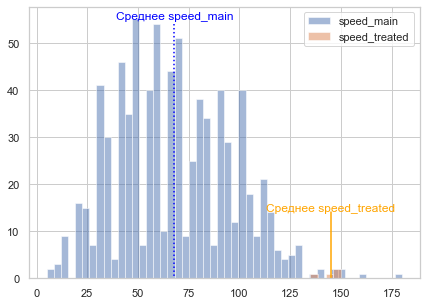

In [675]:
plt.hist(speed_main,bins=50,alpha = .5, label='speed_main');
plt.hist(speed_treated,bins=4,alpha = .5, label='speed_treated');
plt.legend(loc='upper right')

plt.plot([speed_main_m , speed_main_m], [54,0],':m', c= 'blue')
plt.text(speed_main_m, 55, 'Среднее speed_main', c= 'blue', rotation = 'horizontal', ha = 'center')

plt.plot([speed_treated_m , speed_treated_m], [14,0], c= 'orange')
plt.text(speed_treated_m, 14.25, 'Среднее speed_treated', c= 'orange', rotation = 'horizontal', ha = 'center')

Проверим принадлежат ли одной ГС

In [676]:
# проверим на нормальность - критерий Шапиро-Уилка
confidence = 0.05 # примем порог 5%

st, p_val = stats.shapiro(speed_main)  
print(f' speed_main \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    
st, p_val = stats.shapiro(speed_treated)  
print(f'\n speed_treated \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

 speed_main 	 p_val =  0.000 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально

 speed_treated 	 p_val =  0.161 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально


Распределение speed_main **НЕ нормальное**, НО так как условии указано, распределение скоростей принять нормальным будем применять т-тест Стьюдента.  
Если распределение не нормальное то ,по-хорошему, нужно применть критерий Уилкоксона -Манна -Уитни (U-test)

In [680]:
# тест Стьюдента
confidence = 0.01

student_criteria = stats.ttest_1samp(speed_treated,speed_main_m)
print(f'Stat = {student_criteria[0]:.3f}, Критерий Стьюдента = {student_criteria[1]:.3f}', '\n', '-'*35)

if student_criteria[1] < confidence: 
    print(f'\tкритерий Стьюдента < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Стьюдента > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 21.809, Критерий Стьюдента = 0.000 
 -----------------------------------
	критерий Стьюдента < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


In [685]:
#проверим средние
print(f'speed_main_mean= {speed_main_m:.2f}, speed_treated_mean = {speed_treated_m:.2f}', '\n','-'*35)
if speed_main_m > speed_treated_m : print('\t Средняя скорость всех зверьков больше, чем средняя скорость "treated", \n\tМикстура доктора Джекилла НЕ работает.')
else: print('\t Средняя скорость "treated" больше, чем средняя скорость всех зверьков, \n\tМикстура доктора Джекилла работает.')

speed_main_mean= 67.89, speed_treated_mean = 145.00 
 -----------------------------------
	 Средняя скорость "treated" больше, чем средняя скорость всех зверьков, 
	Микстура доктора Джекилла работает 


In [689]:
# Критерий Уилкоксона -Манна -Уитни (U-test)
confidence = 0.01
from scipy.stats import mannwhitneyu

st, p_val = mannwhitneyu(speed_main, speed_treated)
print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 19.500, Критерий Уилкоксона -Манна -Уитни = 0.000 
 -----------------------------------
	критерий Уилкоксона -Манна -Уитни < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


Критерий Уилкоксона -Манна -Уитни тоже говорит, что распределения не принадлежат одной ГС

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [705]:
legen_WaitForIt_dary_sum = df.loc[df.Legendary == 1, ['HP','Attack','Defense']].apply(lambda x: x['HP'] + x['Attack'] + x['Defense'],axis =1)
legen_WaitForIt_dary_multiplication = df.loc[df.Legendary == 1, ['HP','Attack','Defense']].apply(lambda x: x['HP'] * x['Attack'] * x['Defense'],axis =1)

denied_sum = df.loc[df.Legendary == 0, ['HP','Attack','Defense']].apply(lambda x: x['HP'] + x['Attack'] + x['Defense'],axis =1)
denied_multiplication = df.loc[df.Legendary == 0, ['HP','Attack','Defense']].apply(lambda x: x['HP'] * x['Attack'] * x['Defense'],axis =1)



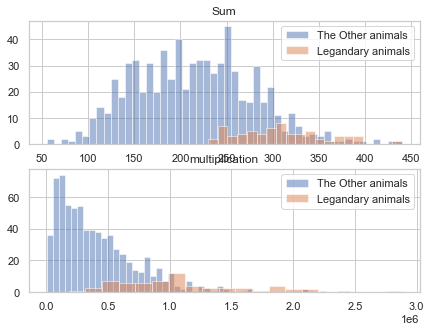

In [720]:
fig = plt.figure()
fig.add_subplot(211)
plt.hist(denied_sum,bins = 50,alpha =.5, label='The Other animals');
plt.hist(legen_WaitForIt_dary_sum,bins = 20,alpha =.5,label='Legandary animals');
plt.title('Sum')
plt.legend(loc='upper right')

fig.add_subplot(212)
plt.hist(denied_multiplication,bins = 50,alpha =.5, label='The Other animals');
plt.hist(legen_WaitForIt_dary_multiplication,bins = 20,alpha =.5,label='Legandary animals');
plt.title('multiplication')
plt.legend(loc='upper right')

По гистограммам видно, что выборки разные. Проверим принадлежат так ли это. принадлежат ли они одной ГС

In [723]:
# проверим на нормальность - критерий Шапиро-Уилка
confidence = 0.05 # примем порог 5%

st, p_val = stats.shapiro(denied_sum)  
print(f' Остальные покемоны_сумма \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    
st, p_val = stats.shapiro(legen_WaitForIt_dary_sum)  
print(f'\n Легендарные покемоны_сумма \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

 Остальные покемоны_сумма 	 p_val =  0.000 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально

 Легендарные покемоны_сумма 	 p_val =  0.073 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально


Распределение `Остальные покемоны_сумма` **НЕ нормальное**, НО так как условии указано, распределение принять нормальным будем применять т-тест Стьюдента.  
Если распределение не нормальное то ,по-хорошему, нужно применть критерий Уилкоксона -Манна -Уитни (U-test)

In [730]:
# критерий Стьюдента
confidence = 0.01

student_criteria = stats.ttest_1samp(legen_WaitForIt_dary_sum,popmean=denied_sum.mean())
print(f'Stat = {student_criteria[0]:.3f}, Критерий Стьюдента = {student_criteria[1]:.3f}', '\n', '-'*35)
if student_criteria[1] < confidence: 
    print(f'\tкритерий Стьюдента < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Стьюдента > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 16.438, Критерий Стьюдента = 0.000 
 -----------------------------------
	критерий Стьюдента < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


In [729]:
#проверим средние
legendary_m = legen_WaitForIt_dary_sum.mean()
other_m = denied_sum.mean()
print(f'legendary_mean= {legendary_m:.2f}, other_mean = {other_m:.2f}', '\n','-'*35)
if legendary_m > other_m : print('\t Средняя суммы Здровья, Атаки и Защиты "legendary" больше, чем средняя у остальных зверьков')
else: print('\t Средняя суммы Здровья, Атаки и Защиты у остальных зверьков больше, чем средняя у "legendary" ')

legendary_mean= 309.08, other_mean = 214.41 
 -----------------------------------
	 Средняя суммы Здровья, Атаки и Защиты "legendary" больше, чем средняя у остальных зверьков


In [731]:
# Критерий Уилкоксона -Манна -Уитни (U-test)
confidence = 0.01

st, p_val = mannwhitneyu(legen_WaitForIt_dary_sum, denied_sum)
print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 5576.000, Критерий Уилкоксона -Манна -Уитни = 0.000 
 -----------------------------------
	критерий Уилкоксона -Манна -Уитни < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


Критерий Уилкоксона -Манна -Уитни тоже говорит, что распределения не принадлежат одной ГС

Проверим распределения произведения параметров Здровья, Атаки и Защиты 

In [733]:
# проверим на нормальность - критерий Шапиро-Уилка
confidence = 0.05 # примем порог 5%

st, p_val = stats.shapiro(denied_multiplication)  
print(f' Остальные покемоны_произведения \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    
st, p_val = stats.shapiro(legen_WaitForIt_dary_multiplication)  
print(f'\n Легендарные покемоны_произведения \t p_val =  {p_val:.3f}', '\n', '-'*35)

if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')

 Остальные покемоны_произведения 	 p_val =  0.000 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально

 Легендарные покемоны_произведения 	 p_val =  0.003 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально


Распределение `Остальные покемоны_произведения` и `Легендарные покемоны_произведения` **НЕ нормальное**, НО так как в условии указано, распределение принять нормальным будем применять т-тест Стьюдента.  
Если распределение не нормальное то ,по-хорошему, нужно применть критерий Уилкоксона -Манна -Уитни (U-test)

In [734]:
# критерий Стьюдента
confidence = 0.01

student_criteria = stats.ttest_1samp(legen_WaitForIt_dary_multiplication,popmean=denied_multiplication.mean())
print(f'Stat = {student_criteria[0]:.3f}, Критерий Стьюдента = {student_criteria[1]:.3f}', '\n', '-'*35)
if student_criteria[1] < confidence: 
    print(f'\tкритерий Стьюдента < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Стьюдента > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 10.306, Критерий Стьюдента = 0.000 
 -----------------------------------
	критерий Стьюдента < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


In [735]:
#проверим средние
legendary_m = legen_WaitForIt_dary_multiplication.mean()
other_m = denied_multiplication.mean()
print(f'legendary_mean= {legendary_m:.2f}, other_mean = {other_m:.2f}', '\n','-'*35)
if legendary_m > other_m : print('\t Средняя произведения Здровья, Атаки и Защиты "legendary" больше, чем средняя произведения этих парамеров у остальных зверьков')
else: print('\t Средняя произведения Здровья, Атаки и Защиты у остальных зверьков больше, чем средняя произведения этих парамеров у "legendary" ')

legendary_mean= 1085941.62, other_mean = 425041.39 
 -----------------------------------
	 Средняя произведения Здровья, Атаки и Защиты "legendary" больше, чем средняя произведения этих парамеров у остальных зверьков


In [736]:
# Критерий Уилкоксона -Манна -Уитни (U-test)
confidence = 0.01

st, p_val = mannwhitneyu(legen_WaitForIt_dary_multiplication, denied_multiplication)
print(f'Stat = {st:.3f}, Критерий Уилкоксона -Манна -Уитни = {p_val:.3f}', '\n', '-'*35)

if p_val < confidence: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни < {confidence} --> \n\tH0 != True: Средние распределений различаются, \n\tраспределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tкритерий Уилкоксона -Манна -Уитни > {confidence} --> \n\tH0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью')

Stat = 5741.500, Критерий Уилкоксона -Манна -Уитни = 0.000 
 -----------------------------------
	критерий Уилкоксона -Манна -Уитни < 0.01 --> 
	H0 != True: Средние распределений различаются, 
	распределения НЕ принадлежат одной ГС с 99 % уверенностью


Критерий Уилкоксона -Манна -Уитни тоже говорит, что распределения не принадлежат одной ГС

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [737]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [765]:
Puke = {}
for special_name in best_defence_class:
    Puke[special_name] = list(pd.concat([ df.loc[df.Class_1.str.contains(special_name),'Defense'], df.loc[df.Class_2.str.contains(special_name, na=False),'Defense'] ]))

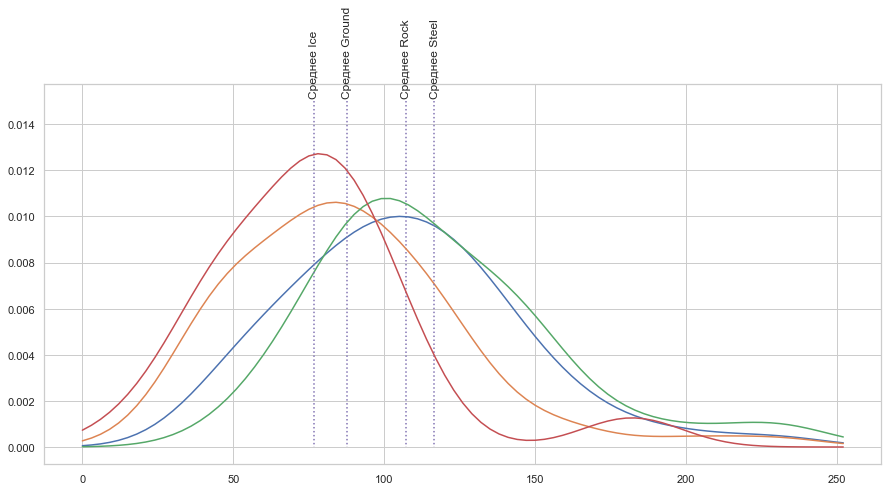

In [856]:
#Пострим гаусиану со средними
plt.figure(figsize=(15,7))

for name in Puke.keys():
    #hist
    #plt.hist(Puke[name], density=True ,bins=20,alpha = 1, label=f'{name}');
    #mean
    m = np.array(Puke[name]).mean()
    plt.plot([m, m], [.015,0],':m')
    plt.text(m, .0152, f'Среднее {name}', rotation = 'vertical', ha = 'center')
    #kde
    kde = stats.gaussian_kde(Puke[name])
    xx = range(0,255,3)
    plt.plot(xx, kde(xx) )
    
#plt.legend(loc='upper right')

#Можно и так
# plt.figure(figsize=(15,5))
# sns.histplot(data= Puke, bins = 20, kde = True)

В задании указано :   
*распределение сум и произведений этих параметров является нормальным*  
Но не указано, что распределние `Defence` нормально. Cтало быть, проверяем `Defence` на нормальность :

In [859]:
# проверим на нормальность - критерием Шапиро-Уилка
confidence = 0.01 # примем порог 1%

for name in Puke.keys():
    st, p_val = stats.shapiro(Puke[name])  
    print(f' {name} \t p_val =  {p_val:.3f}', '\n', '-'*35)

    if (p_val > confidence): print('критерий Шапиро-Уилка: Распределение нормально')
    else: print('критерий Шапиро-Уилка: Распределение НЕ нормально')
    print()


 Rock 	 p_val =  0.129 
 -----------------------------------
критерий Шапиро-Уилка: Распределение нормально

 Ground 	 p_val =  0.001 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально

 Steel 	 p_val =  0.004 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально

 Ice 	 p_val =  0.001 
 -----------------------------------
критерий Шапиро-Уилка: Распределение НЕ нормально



Так как распределения не нормальны, то проверять дисперсионным анализом т-теста нельзя,  
зато можно использвать критерий Уилкоксона-Манна-Уитни

In [933]:
# Puke_df = pd.DataFrame(dict( [ (key,pd.Series(data)) for key,data in Puke.items() ] ) )
# Puke_df.head(3)

array = []
group = []
for key in Puke.keys():
    array += Puke[key]
    group += [key]*len(Puke[key]) 
len(array), len(group)

(212, 212)

In [937]:
df_Puke = pd.DataFrame()
df_Puke['groups'] = group
df_Puke['data'] = array
df_Puke.head(3)

,groups,data
0,Rock,100
1,Rock,115
2,Rock,130


In [942]:
#Проведем многовыборочный критерий Уилкоксона-Манна-Уитни( или Критерий Краскела — Уоллиса)
confidence = 0.01 # примем порог 1%

MultiComp = MultiComparison(df_Puke['data'], df_Puke['groups'])

MultiComp.allpairtest(mannwhitneyu, alpha = confidence)[0]

group1,group2,stat,pval,pval_corr,reject
Ground,Ice,1035.0,0.0563,0.3381,False
Ground,Rock,1328.5,0.0012,0.0071,True
Ground,Steel,908.0,0.0,0.0001,True
Ice,Rock,558.0,0.0,0.0001,True
Ice,Steel,346.0,0.0,0.0,True
Rock,Steel,1239.0,0.128,0.7679,False


Проверим правильно ли отработал `allpairtest` и сравним одну из выборок, например `Steel` и `Ice`

In [944]:
print('Сравним "Steel" и "Ice"')
u_test = mannwhitneyu(Puke['Steel'] ,Puke['Ice'] ) 
print('Statistics=%.3f, p=%.5f' % (u_test[0], u_test[1]))
print('-' *35)
confidence = 0.01   
   
if (u_test[1] > confidence/2) and ( u_test[1] < (1- confidence/2) ) : 
    print(f'\tКритерий Уилкоксона-Манна-Уитни > {confidence/2} или  < {1- confidence/2}  \n \t --> H0 = True: Распределения НЕ различаются с {(1-confidence) *100:.0f} % уверенностью') 
else: 
    print(f'\tКритерий Уилкоксона-Манна-Уитни < {confidence/2} или  > {1- confidence/2} \n \t  --> H0 != True: Распределения НЕ принадлежат одной ГС с {(1-confidence) *100:.0f} % уверенностью')

Сравним "Steel" и "Ice"
Statistics=346.000, p=0.00000
-----------------------------------
	Критерий Уилкоксона-Манна-Уитни < 0.005 или  > 0.995 
 	  --> H0 != True: Распределения НЕ принадлежат одной ГС с 99 % уверенностью


Стало быть, мы можем доверять результатам `allpairtest`, из которых следует:
- Защита зверьков групп `Ground` & `Rock` | `Ground` & `Steel` |  `Ice` & `Rock` |  `Ice` & `Steel` не принадлежат одной ГС 
- Из вышеуказзаного следует, что средние вышеуказанных групп статистически различаются, 
- Осталось только сравнить какая из средних вышеуказанных групп выше или ниже, например так:

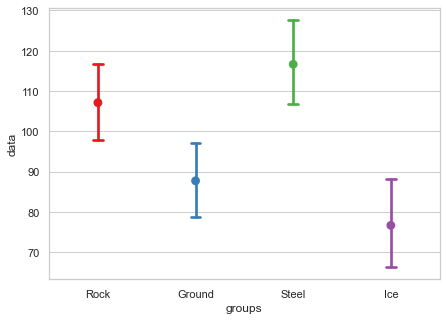

In [965]:
sns.pointplot(y='data',x = 'groups', data=df_Puke, capsize=.1 , palette = 'Set1');

Из графика видно: 
выборка `Steel` и `Rock` имеют больше среднюю, чем у остальных представленных выборок.  
Вышеуказанные выборки статистически отличаются от других выборок (предыдущий `allpairtest`) и имеют самый лучший уровень защиты.